In [79]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Del 2: Godkänt

In [80]:
area_data = pd.read_csv('area_price.csv')
area_data.head()

,sqft_living,price
0,1340,313000.0
1,3650,2384000.0
2,1930,342000.0
3,2000,420000.0
4,1940,550000.0


In [81]:
area_data.describe()

,sqft_living,price
count,4600.000000,4.600000e+03
mean,2139.346957,5.519630e+05
std,963.206916,5.638347e+05
min,370.000000,0.000000e+00
25%,1460.000000,3.228750e+05
50%,1980.000000,4.609435e+05
75%,2620.000000,6.549625e+05
max,13540.000000,2.659000e+07


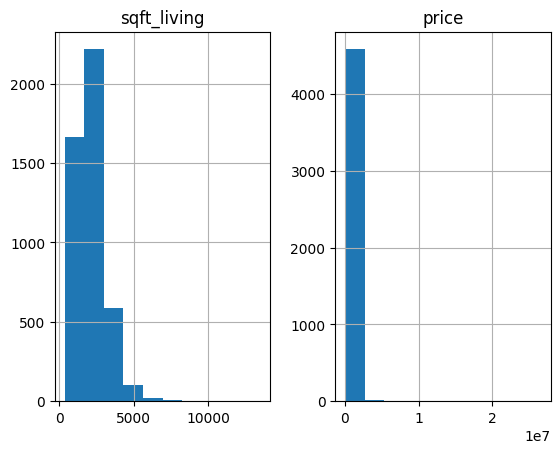

In [82]:
area_data.hist()
plt.show()

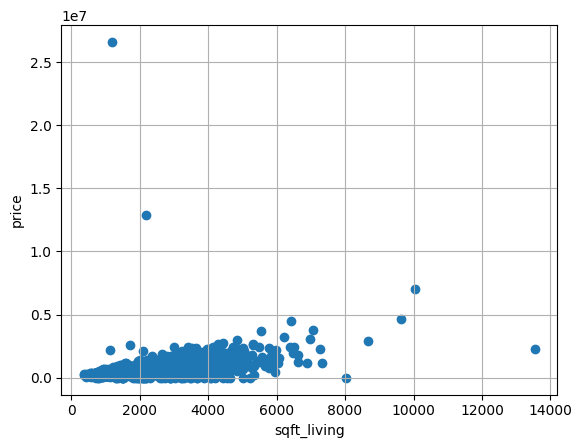

In [83]:
def scatter_2d(df: pd.DataFrame) -> None:
    x = df.keys()[0]
    y = df.keys()[1]
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()

scatter_2d(area_data)
plt.show()

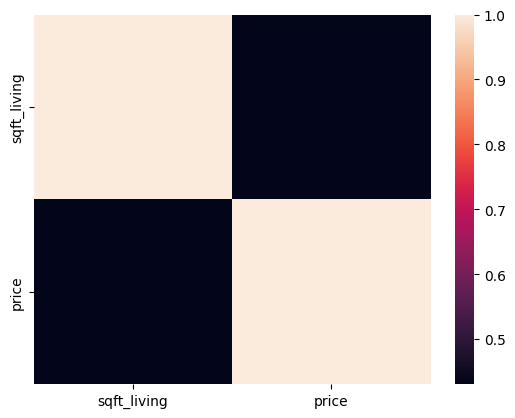

In [84]:
sns.heatmap(area_data.corr())
plt.show()

In [85]:
trimmed_area_data = area_data.loc[area_data['price'] < 10000000]

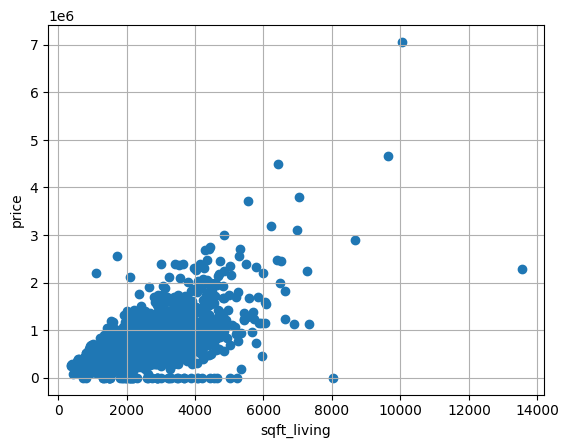

In [86]:
scatter_2d(trimmed_area_data)
plt.show()

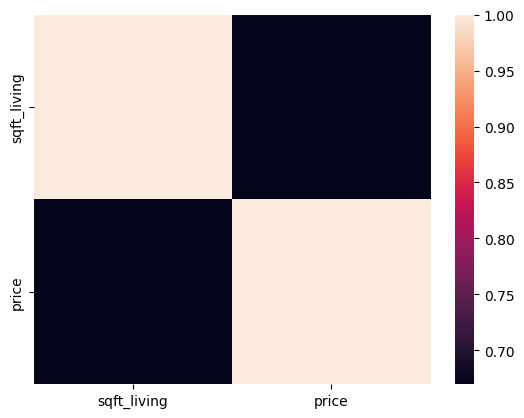

In [87]:
sns.heatmap(trimmed_area_data.corr())
plt.show()


In [88]:
x = trimmed_area_data['sqft_living']
y = trimmed_area_data['price']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.7,
                                                    random_state = 309
                                                    )


In [89]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3218,)
(3218,)
(1380,)
(1380,)


In [90]:
x_train = x_train.array.reshape(-1,1)


In [91]:
y_train = y_train.array.reshape(-1,1)

In [92]:
x_test = x_test.array.reshape(-1,1)

In [93]:
y_test = y_test.array.reshape(-1,1)

In [94]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [95]:
print('Train score:', lr.score(x_train, y_train))
print('Test score', lr.score(x_test, y_test))

Train score: 0.45342856515954544
Test score 0.4314949242741636


In [99]:
reg_line = lr.predict(np.arange(0, 14000).reshape(-1,1))

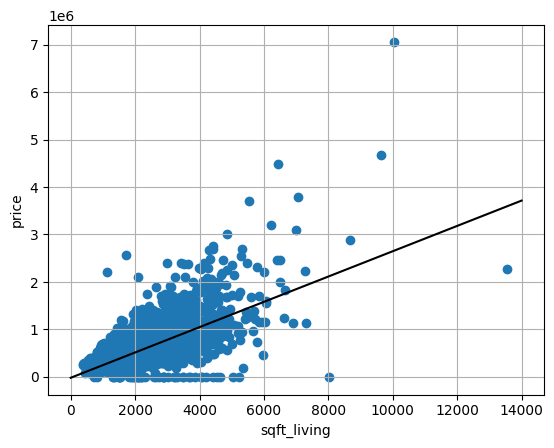

In [100]:
scatter_2d(trimmed_area_data)
plt.plot([0,14000], [reg_line[0],reg_line[-1]], color = 'black')
plt.show()

# Del 3: Väl Godkänt